Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Text(0, 0.5, 'height')

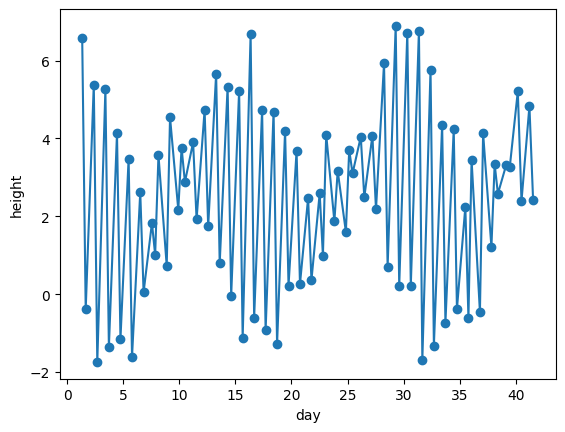

In [3]:
data = np.genfromtxt("/home/kahurd/astr-19/group-project/data.txt",
                     dtype=[('day', 'i8'),('time','U6'),('height','f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
timeint = []
hour = []
minute = []

for i in range(82):
    timeint.append(time[i].split(":"))
    hour.append(int(timeint[i][0]))
    minute.append(int(timeint[i][1]))
    
for i in range (82):
    day[i] = day[i] + (hour[i] + (minute[i]/60))/24

plt.plot(day,height, '-o')
plt.xlabel("day")
plt.ylabel("height")

1.0359870827132298 0.43196783303116093 -4.003707138482989 2.539673566408526


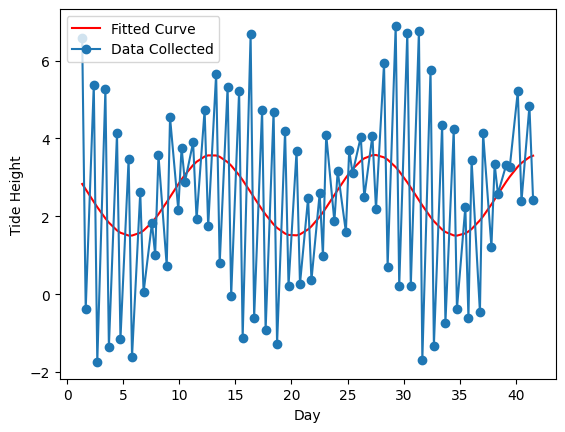

<Figure size 640x480 with 0 Axes>

In [6]:
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line, day, height, sigma = [0.25] * len(data), p0 = [4.2, 0.3, -2, 2.3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = f_line(np.array(day), a_fit, b_fit, c_fit, d_fit)

plt.plot(day, y_fit, label='Fitted Curve', color='red')
plt.plot(day, height, '-o', label='Data Collected')
plt.xlabel("Day of the Year")
plt.ylabel("Tide Height in Feet")
plt.legend()
plt.show()
plt.savefig("data-and-curve.pdf",bbox_inches="tight",facecolor="white")